## Basic Machine Learning Models on Redddit Posts.
In this notebook we will try to fit some basic machine learning models like Logistc Regression with One vs Rest Classifier as this is a multi class classification problem and Random Forest on the Redddit Texts. I will be making use of TFIDF to get the model working on text data.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/clean_reddit_posts.csv')
df.head()

,Title,Body,SubReddit,Clean_Title,Clean_Body
0,What things about React annoy you the most?,"Can be anything: missing features, boilerplate...",reactjs,What things about React annoy you the most,Can be anything missing features boilerplate b...
1,Tutorial: Building a contacts manager using Vu...,missing,vuejs,Tutorial Building a contacts manager using Vue...,missing
2,Having trouble deciding what design pattern sh...,The structure of my project is the following:\...,vuejs,Having trouble deciding what design pattern sh...,The structure of my project is the following A...
3,Prettier rule for this?,I use Prettier and the auto format on save opt...,reactjs,Prettier rule for this,I use Prettier and the auto format on save opt...
4,Conditional Rendering in Vue JS - Beginner Tut...,missing,vuejs,Conditional Rendering in Vue JS Beginner Tutorial,missing


In [0]:
df = df.loc[:, ['Clean_Title', 'Clean_Body', 'SubReddit']]
df.head()

,Clean_Title,Clean_Body,SubReddit
0,What things about React annoy you the most,Can be anything missing features boilerplate b...,reactjs
1,Tutorial Building a contacts manager using Vue...,missing,vuejs
2,Having trouble deciding what design pattern sh...,The structure of my project is the following A...,vuejs
3,Prettier rule for this,I use Prettier and the auto format on save opt...,reactjs
4,Conditional Rendering in Vue JS Beginner Tutorial,missing,vuejs


In [0]:
df['Text'] = df['Clean_Title'] + ' ' + df['Clean_Body']

In [0]:
subreddit = {
    'reactjs': 0,
    'angular': 1,
    'vuejs': 2
}

df['SubReddit'] = df['SubReddit'].map(subreddit)
df['SubReddit'].value_counts(dropna=False)

1    993
0    953
2    871
Name: SubReddit, dtype: int64

In [0]:
df['Text'] = df['Text'].fillna('missing')

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['SubReddit'], test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(2253,)
(564,)


In [0]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)

word_vectorizer.fit(df['Text'])
train_word_features = word_vectorizer.transform(X_train)
test_word_features = word_vectorizer.transform(X_test)

In [0]:
classifier = OneVsRestClassifier(LogisticRegression(class_weight = "balanced", C=0.5, solver='sag'))
classifier.fit(train_word_features, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=0.5, class_weight='balanced',
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='sag', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [0]:
y_pred_ovr = classifier.predict(test_word_features)
print(accuracy_score(y_test, y_pred_ovr))

0.8812056737588653


In [0]:
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=0)
rf.fit(train_word_features, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf = rf.predict(test_word_features)
print(accuracy_score(y_test, y_pred_rf))

0.8652482269503546


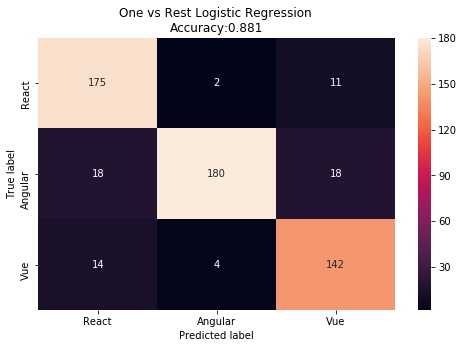

In [0]:

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred_ovr) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['React','Angular','Vue'], 
                     columns = ['React','Angular','Vue'])

plt.figure(figsize=(8,5))
sns.heatmap(cm_df, annot=True, fmt="d")
plt.title('One vs Rest Logistic Regression \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred_ovr)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

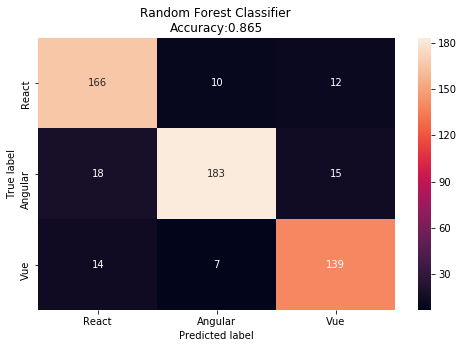

In [0]:
# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred_rf) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['React','Angular','Vue'], 
                     columns = ['React','Angular','Vue'])

plt.figure(figsize=(8,5))
sns.heatmap(cm_df, annot=True, fmt="d")
plt.title('Random Forest Classifier \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred_rf)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()